### 목표
 - 버섯의 특징을 활용해 독버섯 / 식용버섯 이진 분류(클래스가 2개인 분류)하기
 - Decision Tree 모델 활용하기
 - Decision Tree 학습현황 시각화(Decision Tree는 학습현황을 보여줌(얘만, 얘 특징))
     & 과대적합 제어(하이퍼 파라미터 튜닝)
 - 특성의 중요도를 파악 확인하기(불순한 정도를 파악하는 것 : 지니 불순도)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# train, test 랜덤샘플링 도구
from sklearn.model_selection import train_test_split

# knn 모델 : from sklearn.neighbors import KNeighborsClassifier
# tree 분류 모델
from sklearn.tree import DecisionTreeClassifier

### 데이터 불러오기

In [2]:
# data 폴더에 있는 mushroom 데이터 가져와서 data 변수에 담시
pd.options.display.max_columns = None
data = pd.read_csv('data/mushroom.csv')
# 정보 확인
data.info()
# 데이터 타입 object , 결측치 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
# stalk-root : ? 데이터가 들어있음
# 모든 컬럼에는 문자열 데이터만 들어있음
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


### 데이터 전처리 및 탐색
 - 머신러닝은 숫자형태만 학습(이해)가능 -> 문자열 데이터를 숫자형태로 변환
 - 문제(특성)와 답(레이블) 분리
 - X , y 간단한 통계량 확인
 - 머신러닝 모델은 숫자만을 인식할 수 있음 : 문자 > 숫자
 - 훈련셋, 테스트셋 분리

In [4]:
y = data['poisonous']
X = data.iloc[:,1:]

In [5]:
del data['poisonous']

In [6]:
X = data

In [7]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [8]:
# 통계량 확인해보기
# .describe()
X.describe()
# 문자 데이터(범주 데이터) 에 대한 통계는
# 최빈값, 유니크한 값을 표현해줌

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
# y클래스(카테고리) 개수 확인
# 클래스의 다양성이 유지되는지 확인
# p 몇개? , e 몇개?
y.value_counts()
# 식용 버섯에 대한 클래스가 300여개 정도 더 많은 상황

e    4208
p    3916
Name: poisonous, dtype: int64

- 문자(범주형 데이터) > 숫자 : encoding(인코딩)
  - 값의 크고 작음의 의미가 없을 때 : 원 핫 인코딩
  - 값의 크고 작음의 의미가 있을 때 : 레이블 인코딩
    - 한개씩 한개씩 짝 지어줌
    - 규칙에 따라 매칭을 해줌

#### 원 핫 인코딩
 - 데이터가 연속적인 특성, 순서가 없는 경우
 - 하나의 값만 1, 나머지는 0 : 어떤 범주에 속하는지 표현
 - 용량을 많이 차지함
 - 계산 하는데 어려움이 있을 수 있음

In [10]:
# pd.get_dummies(인코딩할 대상)
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [11]:
print(X.shape)
print(X_one_hot.shape)

(8124, 22)
(8124, 117)


In [12]:
# 훈련셋, 테스트셋 분리
# 7:3 비율
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y ,test_size=0.3,random_state=7)

# 크기확인
print('훈련셋 : ' , X_train.shape, y_train.shape)
print('테스트셋 : ', X_test.shape, y_test.shape)


훈련셋 :  (5686, 117) (5686,)
테스트셋 :  (2438, 117) (2438,)


### 모델링
 - 모델 생성
 - 모델 학습
 - 교차검증
 - 모델 예측 및 평가
 - 특성의 중요도 확인
 - 학습현황 시각화(tree - white box)
 - 과대적합을 제어하는 파라미터 연결해보기

In [13]:
# 하이퍼 파라미터를 별도 정의 X -> 기본값으로 연결
# tree_model 변수에 모델 생성
tree_model = DecisionTreeClassifier()
tree_model

DecisionTreeClassifier()

In [14]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

- 교차검증 : 모델의 일반화 성능 확인

        - 모든 데이터에 대해 모델이 얼마나 잘 맞추는지 평가
        - 한 번 나눠서 평가하는 것보다 여러번 나눠서 하기 떄문에 더 안정적인 통계적 평가 방법
        
        방법론 : 훈련세트와 테스트 세츠로 여러번 나눠서 평가
        - 진행시점 : 모델을 생성하고 학습하기 전에도 진행 가능
    

In [15]:
# 도구 불러오기
from sklearn.model_selection import cross_val_score

In [16]:
# cross_val_score(estimator: 예측기(모델명)
#     X: 문제 데이터,
#     y : 답 데이터,
#     scoring : 정확도 점수,
#     cv(cross validation) : 교차검증 횟수(테스트를 분리할 횟수 -> 일반적으로 3번 또는 5번))

cv_result = cross_val_score(tree_model,
    X_train,
    y_train,
   cv=5)
# tree_model한테 X_train, y_train 활용해서 5번의 교차검증을 하겠다

print("교차검증 결과 : ", cv_result)
print("교차검증 평균 : ", cv_result.mean())
# 5번 진행한 후의 결과가 대부분 100% 성능을 내고 있음
# 나름대로 신뢰할 만한 모델임
# 모델이 학습을 잘했따!
# -> 모델의 하이퍼 파라미터를 제어하지 않아도 내부 규칙 생성이 알맞게 되었다
# p,e인지 판단하기 위한 특성 설명이 충분했음 : 데이터가 좋았음
# 하이퍼 파라미터를 제어하지 않아도 되는 상황이다!


교차검증 결과 :  [1.         1.         1.         0.99912049 1.        ]
교차검증 평균 :  0.9998240985048372


In [17]:
# test 예측
# 모델.predict(문제)
pre = tree_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
# 평가 : accuracy_score(테스트용 답,테스트용 문제로 예측한 답)
# accuracy_score(y_test,pre)
tree_model.score(X_test,y_test)   
# 모델.score(문제, 답) -> accuracy 정확도
# predict() 예측 과정 없어도 X_test에 대한 예측값을 내부적으로 데이터를 뽑아내고 y_test와 비교해서 정확도를 측정해줌

1.0

#### 특성 중요도
 - 모델 특성 선택 확인하기
 - feature importances 확인하기

In [19]:
fi = tree_model.feature_importances_
fi.dtype

dtype('float64')

In [20]:
X_col = X_train.columns

In [21]:
# 특성 중요도 np배열 -> df로 변환하면서 컬럼명을 인덱스로 연결하기
fi_df = pd.DataFrame(fi,index=X_col, columns=['feature importances'])
fi_df

,feature importances
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [22]:
# 내림차순 정렬
# 2차원 데이터프레임 -> 뭘 기준으로 어떤 컬럼을 기준으로 정렬해야되냐 : by 값 설정
fi_df.sort_values(by='feature importances',ascending=False)
# fi_df['feature importances'].sort_values(ascending=False)

,feature importances
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-spacing_w,0.000000


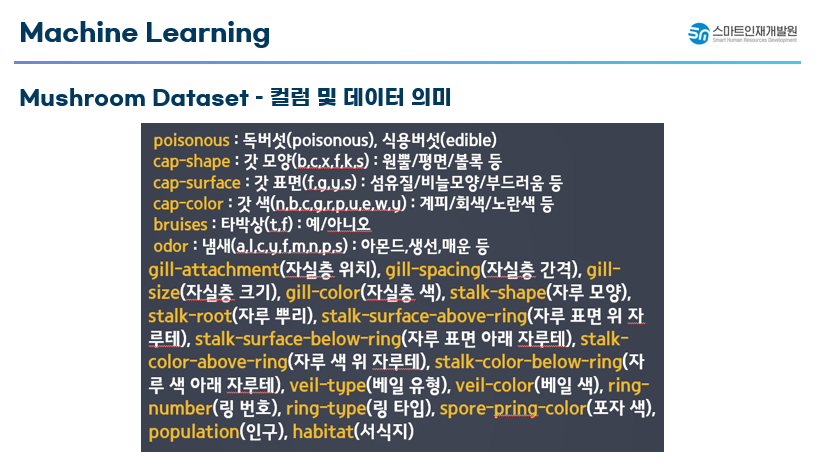

In [23]:
from sklearn.tree import export_graphviz

# 학습시킨 트리모델의 현황을 추출하는 코드
export_graphviz(tree_model, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
               class_names=['독','식용'], # 클래스 이름 표현 설정
               feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
               impurity=False,
               filled=True) # 색상 채움

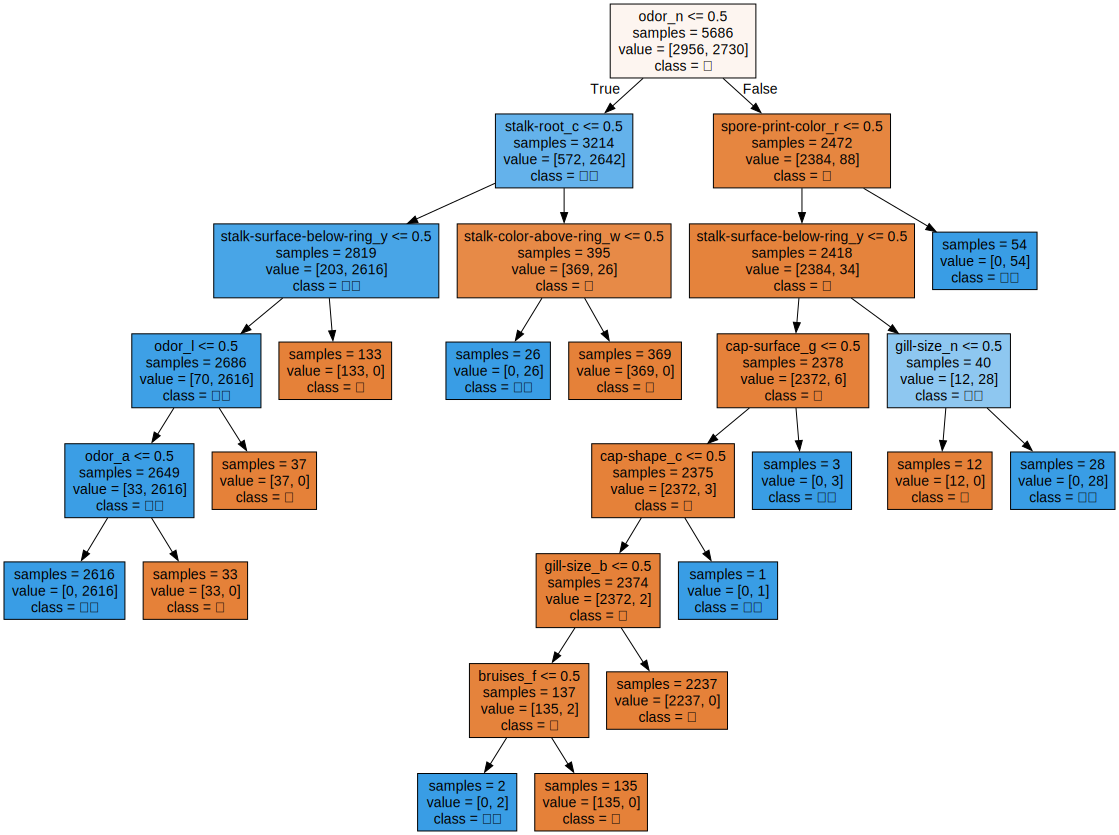

In [24]:
# tree.dot 불러오면서 시각화(그래프화)
import graphviz
# 파일 다루는 파이썬 코드
with open('tree.dot' , encoding = 'UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

#### 과대적합제어 후 시각화 확인
- tree 하이퍼 파라미터 종류 4가지가 존재
    - 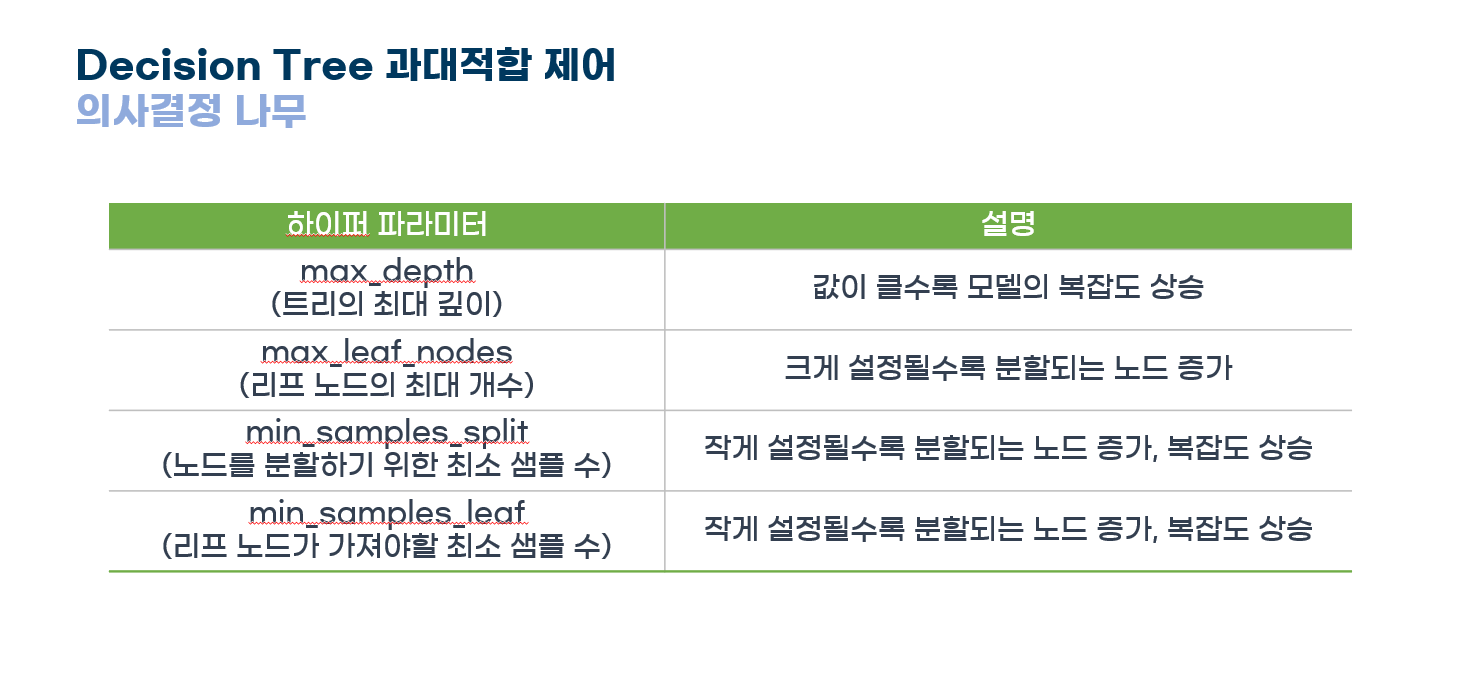
    - max_depth : 최대 깊이
    - max_leaf_nodes : 최대 리프노드 개수
    - min_samples_split : 노드를 분할하기 위한 최소 샘플 수
    - min_samples_leaf : 분리되고 난 후의 노드의 시점
    - 종합적으로 트리 모델의 깊이를 제어하는 파라미터
    

In [25]:
# 모델의 깊이를 설정하는 매개변수 연결 : max_depth
# 노드 깊이 제어가 되는지 시각화 확인
tree_model2 = DecisionTreeClassifier(max_depth = 3)
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
# 교차검증 진행
# 횟수 5 , tree_model2,
cv_result2 = cross_val_score(tree_model2,
    X_train,
    y_train,
    cv=5)

In [27]:
print('교차검증 결과 : ', cv_result2)
print('교차검증 평균 : ', cv_result2.mean())

교차검증 결과 :  [0.98242531 0.98680739 0.98504837 0.97977133 0.98592788]
교차검증 평균 :  0.9839960553548712


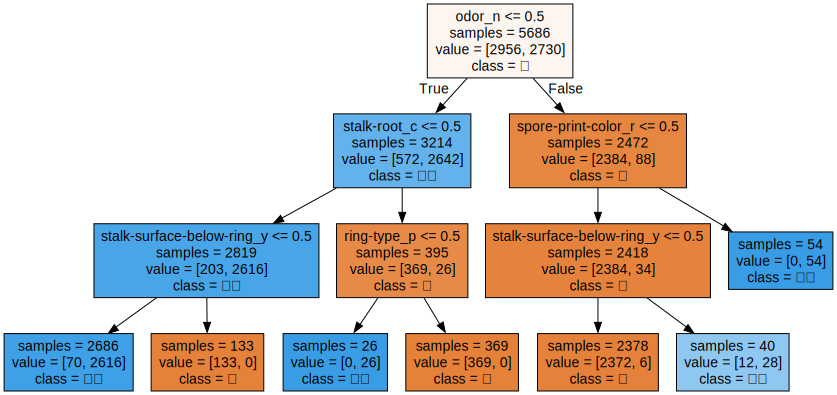

In [28]:
# 학습시킨 트리모델의 현황을 추출하는 코드
export_graphviz(tree_model2, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
               class_names=['독','식용'], # 클래스 이름 표현 설정
               feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
               impurity=False,
               filled=True) # 색상 채움

# 파일 다루는 파이썬 코드
with open('tree.dot' , encoding = 'UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [29]:
print('교차검증 결과 : ', cv_result2)
print('교차검증 평균 : ', cv_result2.mean())

교차검증 결과 :  [0.98242531 0.98680739 0.98504837 0.97977133 0.98592788]
교차검증 평균 :  0.9839960553548712


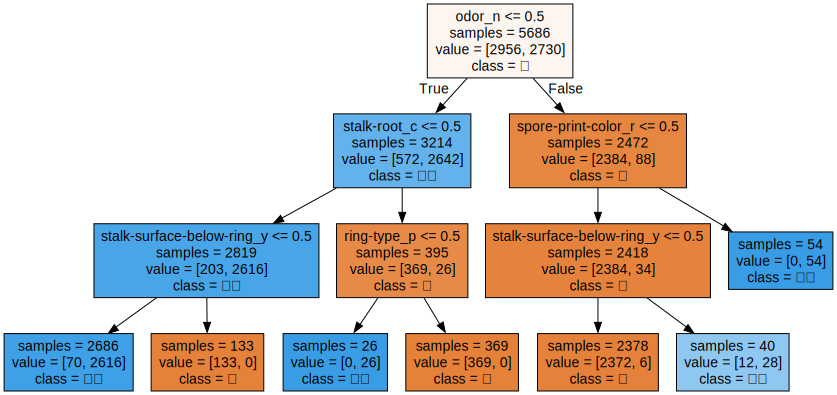

In [30]:
# 학습시킨 트리모델의 현황을 추출하는 코드
export_graphviz(tree_model2, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
               class_names=['독','식용'], # 클래스 이름 표현 설정
               feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
               impurity=False,
               filled=True) # 색상 채움

# 파일 다루는 파이썬 코드
with open('tree.dot' , encoding = 'UTF-8') as f:
    dot_graph2 = f.read()
    
display(graphviz.Source(dot_graph2))

In [31]:
# 현재 버섯을 분류하는 상황에서는 제어할 필요가 없지만
# 다른 데이터를 활용해 학습을 진행할 때에는 일반적으로
# 끝까지 학습하게, 규제하지 않으면 과대적합에 걸릴 확률이 높음